# Credit Card Fraud Detection

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import self_utils as su
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Importing the dataset

In [3]:
df = pd.read_csv('E:/S4/MML/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the discrepencies in the data and performing exploratory data analysis

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
len(df)

284807

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking the distribution of data

<AxesSubplot:xlabel='Class', ylabel='count'>

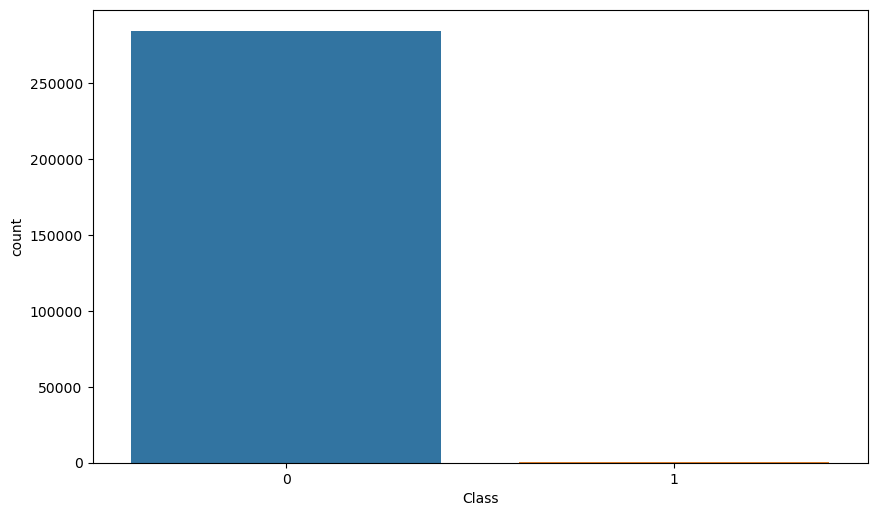

In [8]:
plt.figure(dpi=100, figsize=(10,6))
sns.countplot(data=df, x='Class')

### Checking the effect of `Amount` and `Time` columns of the dataset on `Class`

<AxesSubplot:xlabel='Amount', ylabel='Class'>

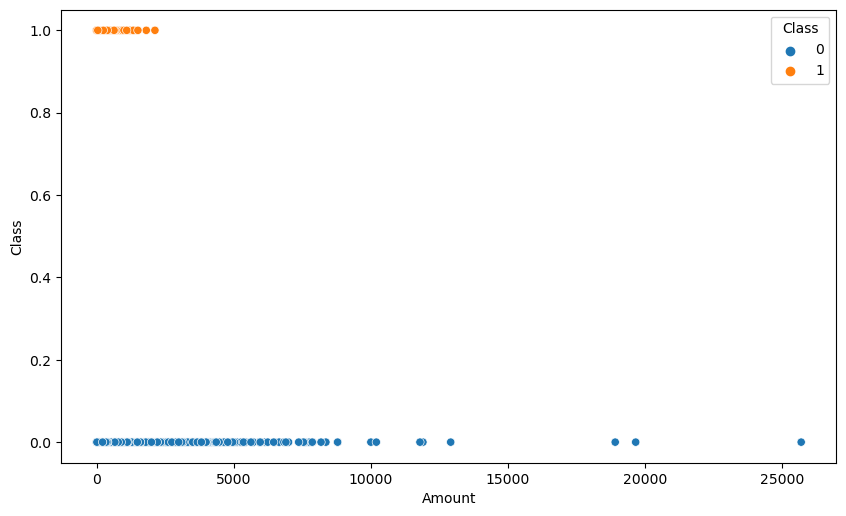

In [9]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class')

<AxesSubplot:xlabel='Time', ylabel='Class'>

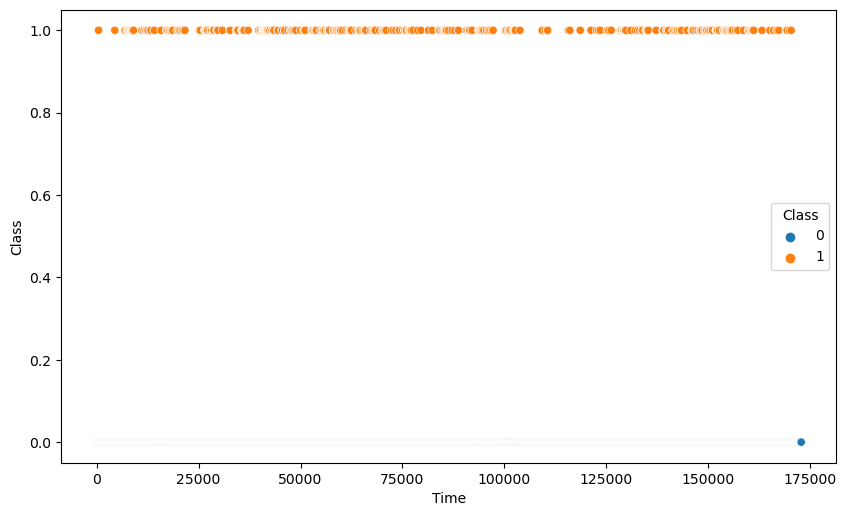

In [10]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', )

### Dropping the non impactful columns

In [11]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scaling `Amount` feature for better results

In [12]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Cleaning the dataset by removing any `NaN` or `infinite` values

In [13]:
df = su.clean_dataset(df)

### Checking the Distribution of various features of our dataset

<Figure size 432x288 with 0 Axes>

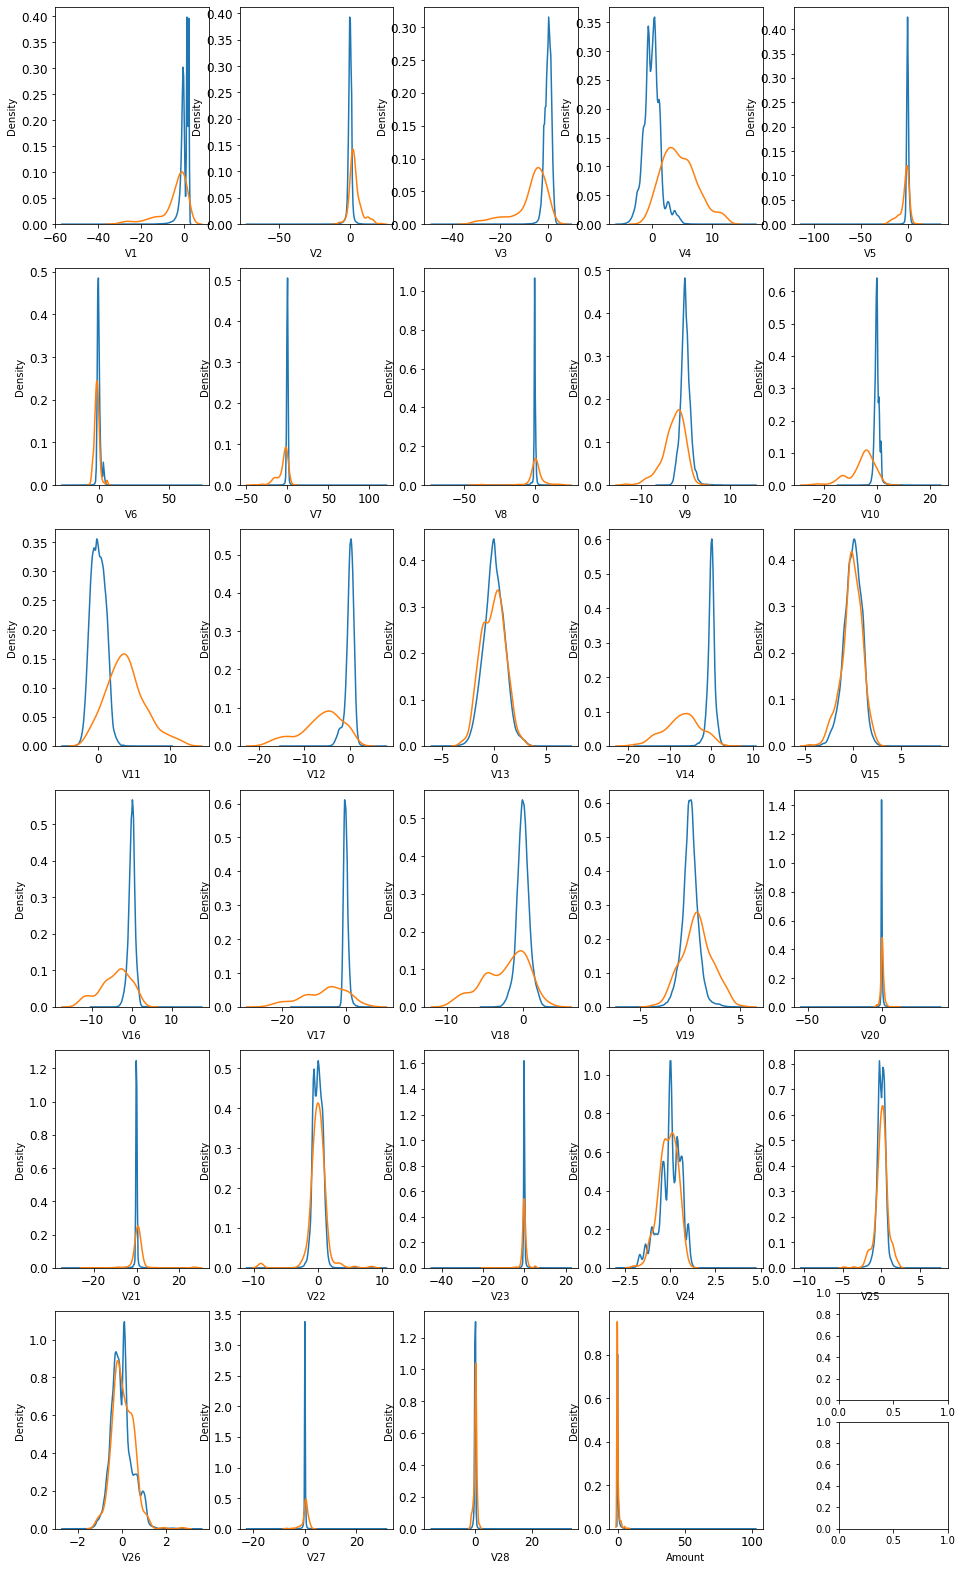

In [14]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show()

## Preparing the dataset for training

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Splitting the dataset into training and validation sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

170884

### Checking skewness and using a transformer to mitigate it

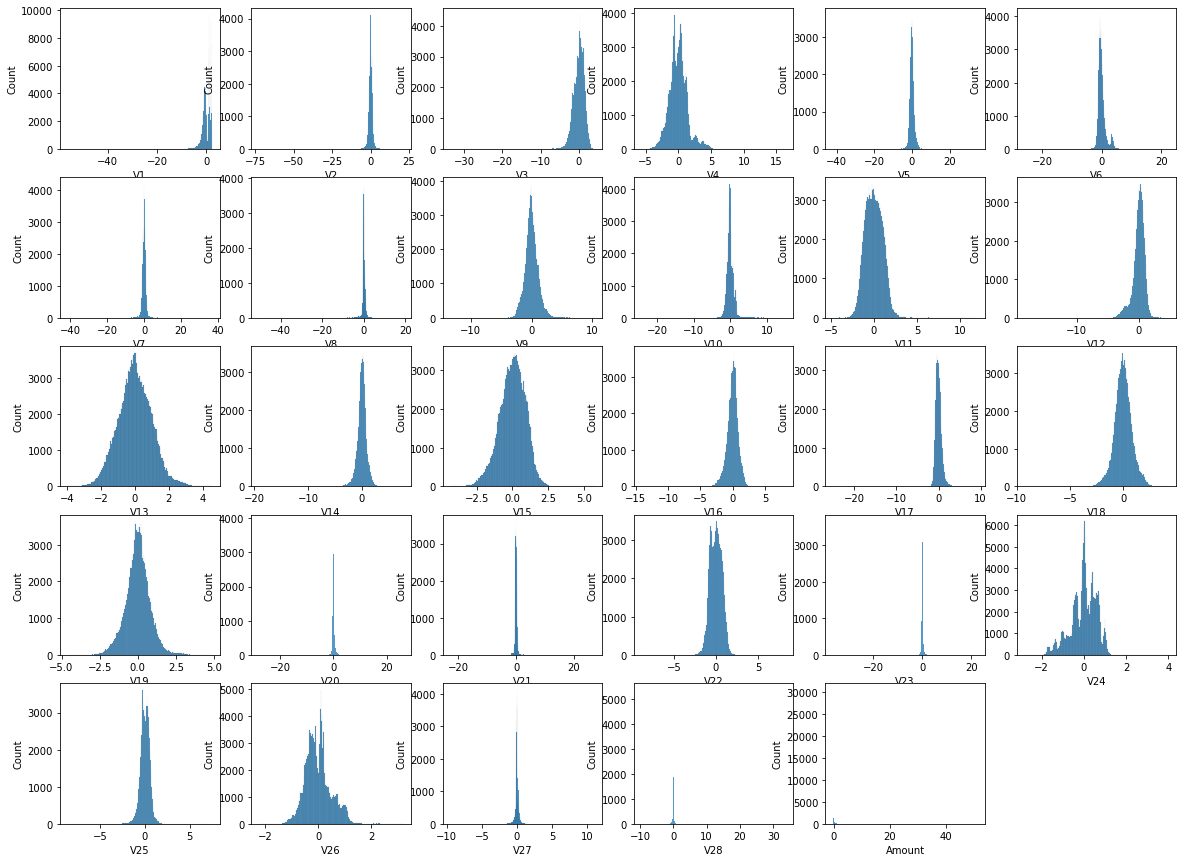

In [17]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

In [18]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col] = pt.fit_transform(X_train)
X_test[col] = pt.transform(X_test)

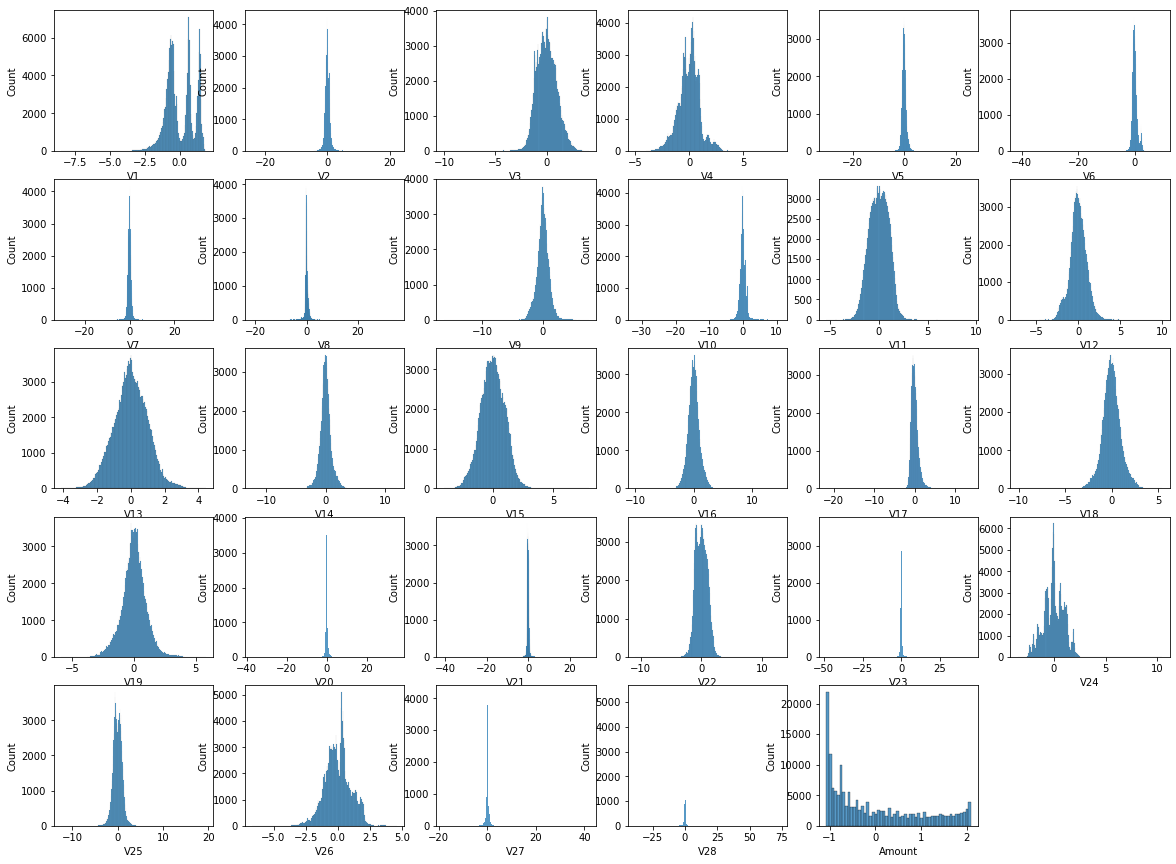

In [19]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

### Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)

In [20]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0.0: 170580, 1.0: 304})
After performing smote :  Counter({0.0: 170580, 1.0: 170580})


## Testing various models on the dataset

### 1.1. Logistic Regression without synthetic data

In [20]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1

0.9992363262905647

#### Confusion Matrix

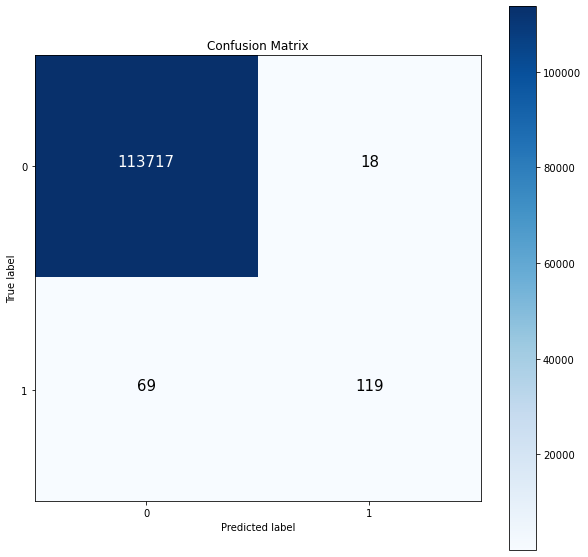

In [21]:
su.make_confusion_matrix(y_test, y_pred_ws_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [22]:
res11 = su.calculate_results(y_test, y_pred_ws_1)
res11

{'accuracy': 99.92363262905647,
 'precision': 0.9991777796981207,
 'recall': 0.9992363262905647,
 'f1': 0.9991764928671306}

### 1.2 Logistic Regression with synthetic data

In [23]:
model_s_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.9681714842481325

#### Confusion Matrix

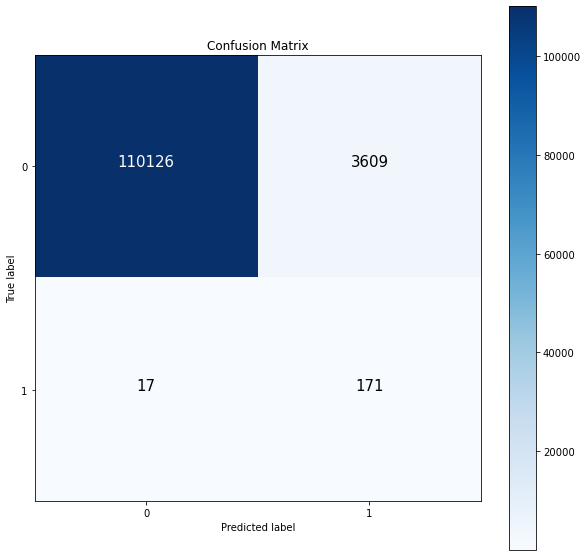

In [24]:
su.make_confusion_matrix(y_test, y_pred_s_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [25]:
res12 = su.calculate_results(y_test, y_pred_s_1)
res12

{'accuracy': 96.81714842481325,
 'precision': 0.9982703260567273,
 'recall': 0.9681714842481325,
 'f1': 0.9823224022904761}

### 2.1. Decision Tree Classifier without synthetic data

In [26]:
model_ws_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

0.9994821063349807

#### Confusion Matrix

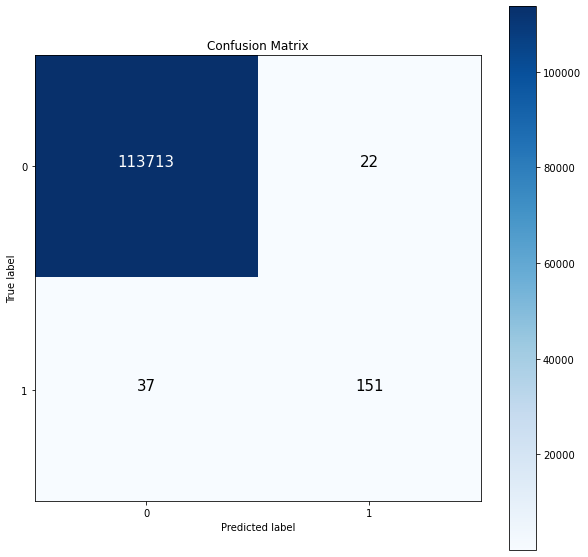

In [27]:
su.make_confusion_matrix(y_test, y_pred_ws_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [28]:
res21 = su.calculate_results(y_test, y_pred_ws_2)
res21

{'accuracy': 99.94821063349806,
 'precision': 0.9994654052708408,
 'recall': 0.9994821063349807,
 'f1': 0.9994713638458463}

### 2.2. Decision Tree Classifier with synthetic data

In [29]:
model_s_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9720688535238714

#### Confusion Matrix

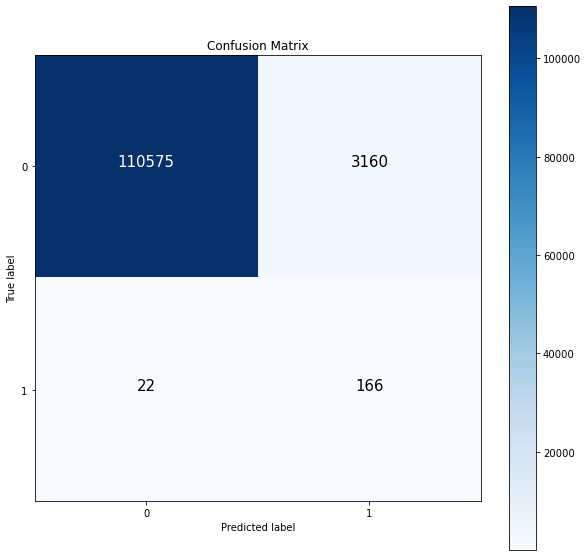

In [30]:
su.make_confusion_matrix(y_test, y_pred_s_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [31]:
res22 = su.calculate_results(y_test, y_pred_s_2)
res22

{'accuracy': 97.20688535238715,
 'precision': 0.9982335334433252,
 'recall': 0.9720688535238714,
 'f1': 0.9843447493002937}

### 3.1. Naive Bayes Classifier without synthetic data

In [32]:
model_ws_3 = GaussianNB()
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.9776340159581471

#### Confusion Matrix

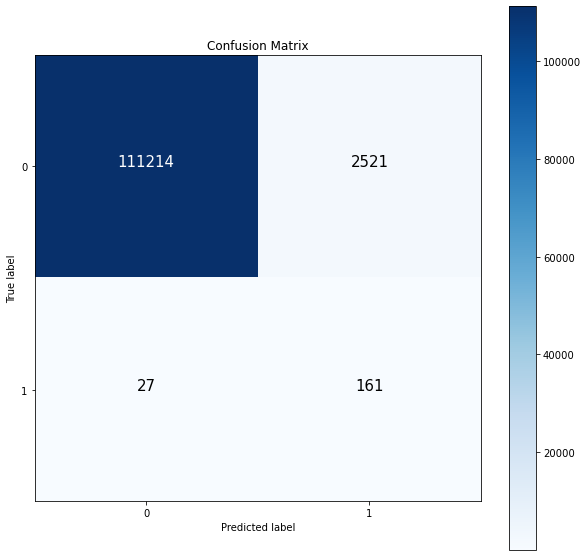

In [33]:
su.make_confusion_matrix(y_test, y_pred_ws_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [34]:
res31 = su.calculate_results(y_test, y_pred_ws_3)
res31

{'accuracy': 97.76340159581471,
 'precision': 0.9982065103042518,
 'recall': 0.9776340159581471,
 'f1': 0.9872279486516491}

### 3.2. Naive Bayes Classifier with synthetic data

In [35]:
model_s_3 = GaussianNB()
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9738683145633454

#### Confusion Matrix

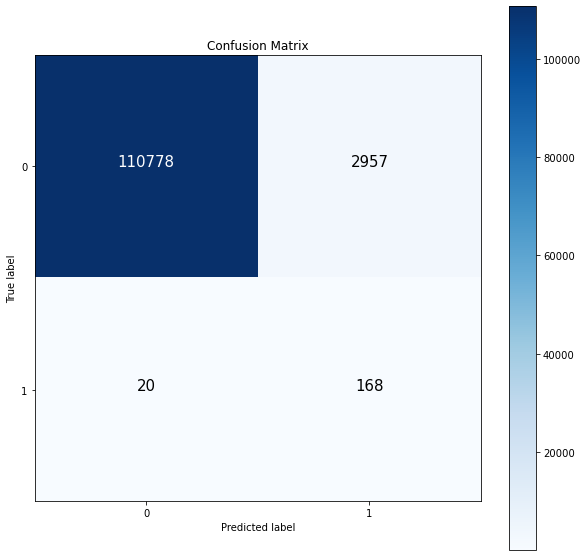

In [36]:
su.make_confusion_matrix(y_test, y_pred_s_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [37]:
res32 = su.calculate_results(y_test, y_pred_s_3)
res32

{'accuracy': 97.38683145633455,
 'precision': 0.9982582685324833,
 'recall': 0.9738683145633454,
 'f1': 0.9852803771719459}

### 4.1. K Nearest Neighbors Classifier without synthetic data

In [38]:
model_ws_4 = KNeighborsClassifier(n_neighbors=3)
model_ws_4.fit(X_train, y_train)
y_pred_ws_4 = model_ws_4.predict(X_test)
acc_ws_4 = accuracy_score(y_test, y_pred_ws_4)
acc_ws_4

0.9996488856508343

#### Confusion Matrix

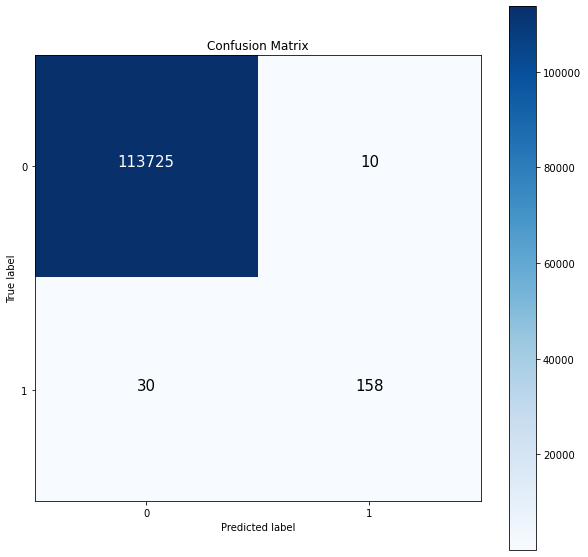

In [39]:
su.make_confusion_matrix(y_test, y_pred_ws_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [40]:
res41 = su.calculate_results(y_test, y_pred_ws_4)
res41

{'accuracy': 99.96488856508343,
 'precision': 0.9996384821177722,
 'recall': 0.9996488856508343,
 'f1': 0.9996390383224936}

### 4.2. K Nearest Neighbors Classifier with synthetic data

In [41]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9982795396890882

#### Confusion Matrix

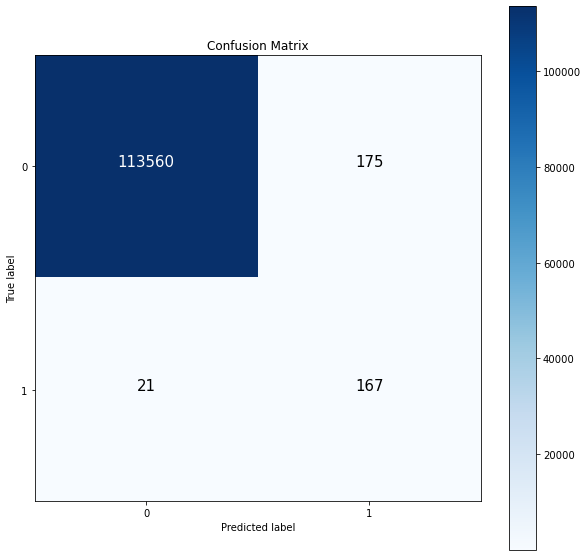

In [42]:
su.make_confusion_matrix(y_test, y_pred_s_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [43]:
res42 = su.calculate_results(y_test, y_pred_s_4)
res42

{'accuracy': 99.82795396890882,
 'precision': 0.9989709952908417,
 'recall': 0.9982795396890882,
 'f1': 0.998528910575908}

### 5.1. Random Forest Classifier without synthetic data

In [44]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

0.9995786627810012

#### Confusion Matrix

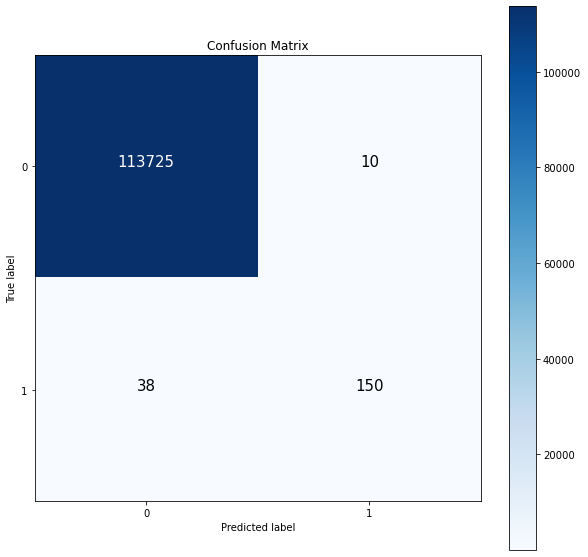

In [45]:
su.make_confusion_matrix(y_test, y_pred_ws_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [46]:
res51 = su.calculate_results(y_test, y_pred_ws_5)
res51

{'accuracy': 99.95786627810011,
 'precision': 0.9995633836255827,
 'recall': 0.9995786627810012,
 'f1': 0.9995617383617827}

#### `Feature importances`

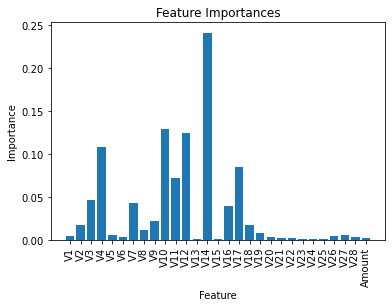

In [68]:
# Calculate feature importances
importances = model_ws_5.feature_importances_

# Calculate mean decrease in impurity
mean_decrease_impurity = model_ws_5.feature_importances_

# Calculate feature importances
importances = model_s_5.feature_importances_

# Calculate mean decrease in impurity
mean_decrease_impurity = model_s_5.feature_importances_

# Create a bar chart of feature importances
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

#### `SHAP`

In [72]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model_ws_5)

# Calculate SHAP values for a single instance
instance = X_test.iloc[0]
shap_values = explainer.shap_values(instance)

# Visualize the SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], instance)

### 5.2. Random Forest Classifier with synthetic data

In [47]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9937852760197677

#### Confusion Matrix

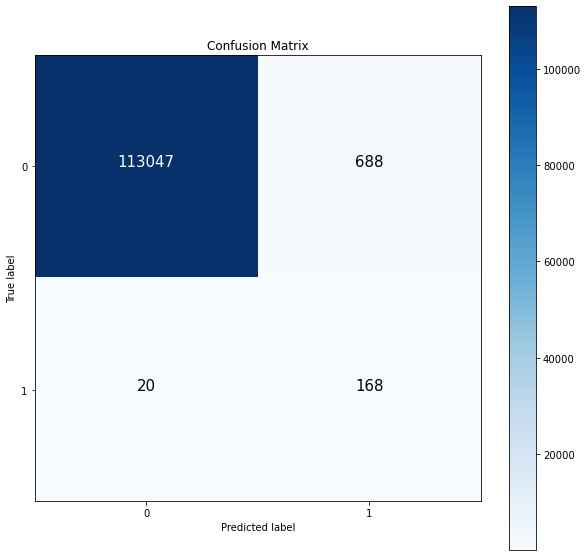

In [48]:
su.make_confusion_matrix(y_test, y_pred_s_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [49]:
res52 = su.calculate_results(y_test, y_pred_s_5)
res52

{'accuracy': 99.37852760197677,
 'precision': 0.9984970465685828,
 'recall': 0.9937852760197677,
 'f1': 0.9957643593551618}

#### `Feature importances`

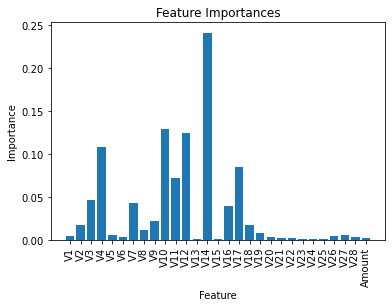

In [67]:
# Calculate feature importances
importances = model_s_5.feature_importances_

# Calculate mean decrease in impurity
mean_decrease_impurity = model_s_5.feature_importances_

# Create a bar chart of feature importances
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

#### `SHAP`

In [70]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model_s_5)

# Calculate SHAP values for a single instance
instance = X_test.iloc[0]
shap_values = explainer.shap_values(instance)

# Visualize the SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], instance)

### 6.1. Support Vector Classifier without synthetic data

In [50]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

0.9994645506175224

#### Confusion Matrix


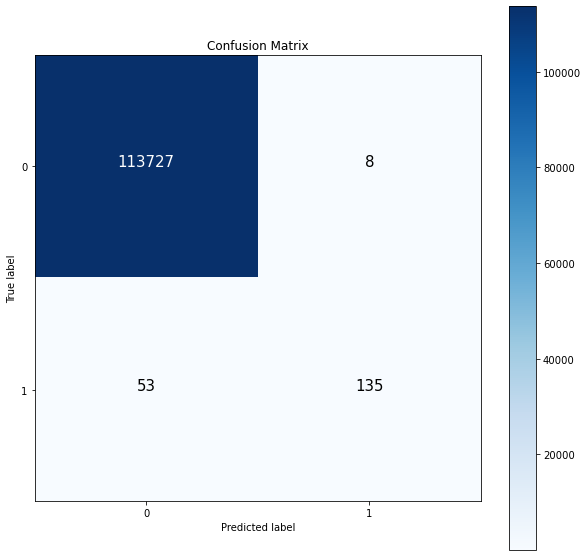

In [51]:
su.make_confusion_matrix(y_test, y_pred_ws_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [52]:
res61 = su.calculate_results(y_test, y_pred_ws_6)
res61

{'accuracy': 99.94645506175223,
 'precision': 0.9994426365087574,
 'recall': 0.9994645506175224,
 'f1': 0.9994282059539296}

### 6.2. Support Vector Classifier with synthetic data

In [53]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

0.9833835134257349

#### Confusion Matrix

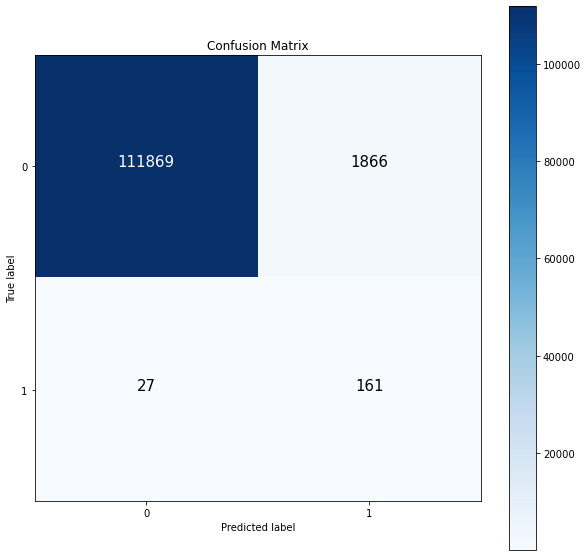

In [54]:
su.make_confusion_matrix(y_test, y_pred_s_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [55]:
res62 = su.calculate_results(y_test, y_pred_s_6)
res62

{'accuracy': 98.33835134257349,
 'precision': 0.998239939871918,
 'recall': 0.9833835134257349,
 'f1': 0.9902137022133424}

#### `Permutation importance`

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate feature importances using the 'permutation_importance' function
importances = permutation_importance(model_s_6, X_test, y_test, n_repeats=10, random_state=0)

# Sort features by importance
sorted_importances = sorted(enumerate(importances.importances_mean), key=lambda x: x[1], reverse=True)

# Separate feature names and importance values
features, importance_values = zip(*sorted_importances)

# Create a bar chart of feature importances
plt.bar(features, importance_values)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

### 7.1. XGBoost Classifier without synthetic data

In [21]:
model_ws_7 = XGBClassifier()
model_ws_7.fit(X_train, y_train)
y_pred_ws_7 = model_ws_7.predict(X_test)
acc_ws_7 = accuracy_score(y_test, y_pred_ws_7)
acc_ws_7

0.9996225520746469

#### Confusion Matrix

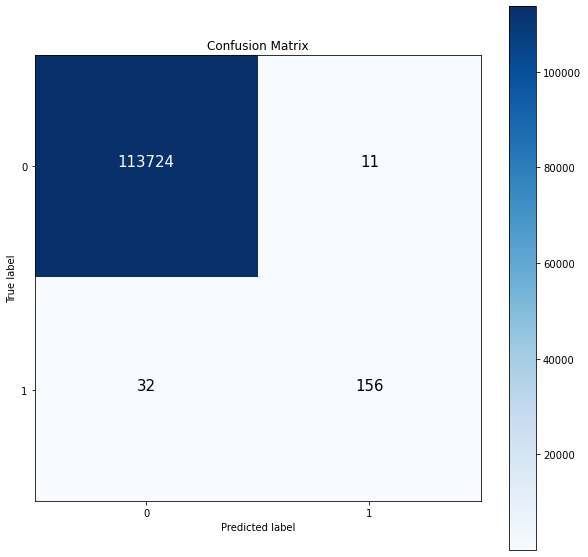

In [22]:
su.make_confusion_matrix(y_test, y_pred_ws_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [23]:
res71 = su.calculate_results(y_test, y_pred_ws_7)
res71

{'accuracy': 99.9622552074647,
 'precision': 0.9996104621002588,
 'recall': 0.9996225520746469,
 'f1': 0.999611405543288}

### 7.2. XGBoost Classifier with synthetic data

In [24]:
model_s_7 = XGBClassifier()
model_s_7.fit(X_train_smote, y_train_smote)
y_pred_s_7 = model_s_7.predict(X_test)
acc_s_7 = accuracy_score(y_test, y_pred_s_7)
acc_s_7

0.9991748812794606

#### Confusion Matrix

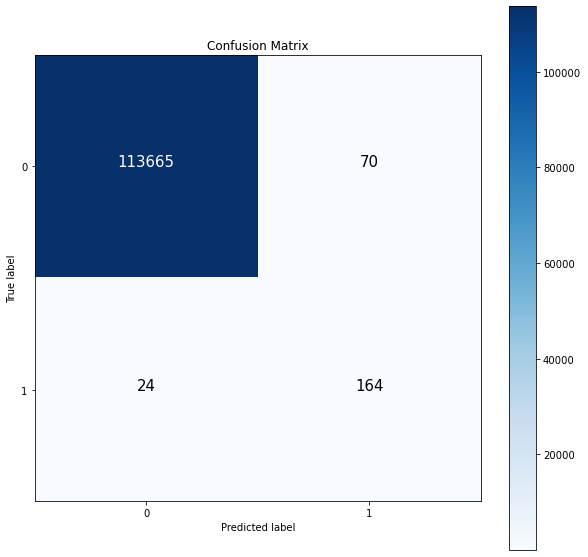

In [25]:
su.make_confusion_matrix(y_test, y_pred_s_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [26]:
res72 = su.calculate_results(y_test, y_pred_s_7)
res72

{'accuracy': 99.91748812794606,
 'precision': 0.9992955853783579,
 'recall': 0.9991748812794606,
 'f1': 0.9992197687585153}

#### `Feature Importances`

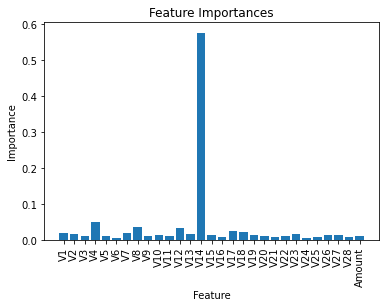

In [75]:
# Calculate feature importances
importances = model_s_7.feature_importances_

# Create a bar chart of feature importances
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

#### `Feature Importances (Weight)`

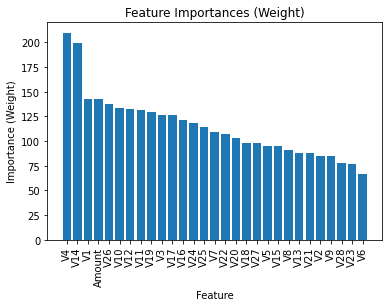

In [77]:
# Calculate feature importances using the 'weight' method
importances = model_s_7.get_booster().get_score(importance_type='weight')

# Sort features by importance
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Separate feature names and importance values
features, importance_values = zip(*sorted_importances)

# Create a bar chart of feature importances
plt.bar(features, importance_values)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance (Weight)")
plt.title("Feature Importances (Weight)")
plt.show()

#### `Feature Importances (Cover)`

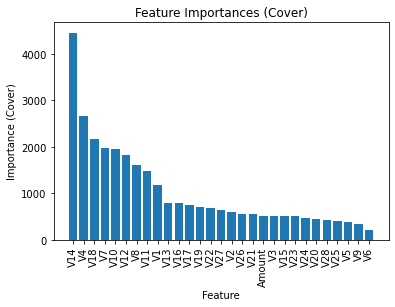

In [78]:
# Calculate feature importances using the 'cover' method
importances = model_s_7.get_booster().get_score(importance_type='cover')

# Sort features by importance
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Separate feature names and importance values
features, importance_values = zip(*sorted_importances)

# Create a bar chart of feature importances
plt.bar(features, importance_values)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance (Cover)")
plt.title("Feature Importances (Cover)")
plt.show()

#### `Feature Importances (gain)`

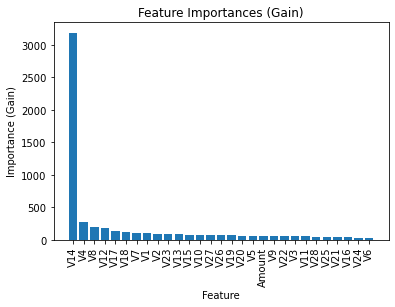

In [79]:
# Calculate feature importances using the 'gain' method
importances = model_s_7.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Separate feature names and importance values
features, importance_values = zip(*sorted_importances)

# Create a bar chart of feature importances
plt.bar(features, importance_values)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance (Gain)")
plt.title("Feature Importances (Gain)")
plt.show()

# Comparing precision, accuracy f1 score and recall of all the models

In [62]:
dp = pd.DataFrame([res11,res12,res21,res22,res31,res32,res41,res42,res51,res52,res61,res62,res71,res72],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2','5.1','5.2','6.1','6.2','7.1','7.2'])

In [63]:
dp

,accuracy,precision,recall,f1
1.1,99.923633,0.999178,0.999236,0.999176
1.2,96.817148,0.998270,0.968171,0.982322
2.1,99.948211,0.999465,0.999482,0.999471
2.2,97.206885,0.998234,0.972069,0.984345
3.1,97.763402,0.998207,0.977634,0.987228
3.2,97.386831,0.998258,0.973868,0.985280
4.1,99.964889,0.999638,0.999649,0.999639
4.2,99.827954,0.998971,0.998280,0.998529
5.1,99.957866,0.999563,0.999579,0.999562
5.2,99.378528,0.998497,0.993785,0.995764


## Save the Perfect Model

In [27]:
import pickle

filename = 'fraud_detection.sav'
pickle.dump(model_s_7, open(filename, 'wb'))